In [1]:
# Import Libraries and DataSet
import warnings
import pandas as pd
import numpy as np 
import pylab
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
from numpy import loadtxt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
#Training data
RamanTR = loadtxt(r'.\TrainingData\RAMANTR.csv', delimiter=',', dtype='float64')
RamanRE = loadtxt(r'.\TrainingData\RAMANRE.csv', delimiter=',', dtype='float64')
NIRTR = loadtxt(r'.\TrainingData\NIRTR.csv', delimiter=',', dtype='float64')
NIRRE = loadtxt(r'.\TrainingData\NIRRE.csv', delimiter=',', dtype='float64')

#COMPMax = np.array(COMPMax[np.newaxis].T)
#Target
Content = loadtxt(r'.\TrainingData\CONTENT.csv', delimiter=',', dtype='float64')
DR=Content[:,0:1]
HPMC=Content[:,1:2]



In [3]:
#Validation data
RamanTRVal = loadtxt(r'.\Validation\RAMANTR-validation.csv', delimiter=',', dtype='float64')
RamanREVal = loadtxt(r'.\Validation\RAMANRE-validation.csv', delimiter=',', dtype='float64')
NIRTRVal = loadtxt(r'.\Validation\NIRTR-validation.csv', delimiter=',', dtype='float64')
NIRREVal = loadtxt(r'.\Validation\NIRRE-validation.csv', delimiter=',', dtype='float64')

#Target
ContentVal = loadtxt(r'.\Validation\CONTENT-validation.csv', delimiter=',', dtype='float64')
DRVAL=ContentVal[:,0:1]
HPMCVAL=ContentVal[:,1:2]






(111, 80)
(37, 80)
(111, 1)
[0.63336987 0.18247636 0.10163475 0.03449424 0.01383633 0.00364366
 0.0025554  0.0016929  0.00111108 0.00103551]


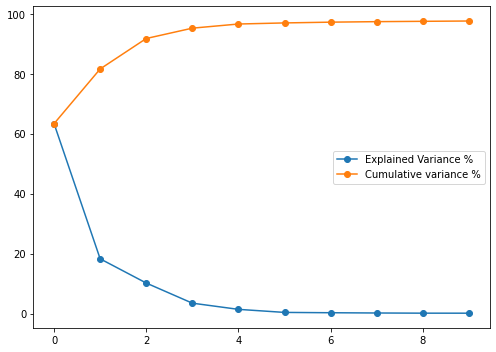

In [4]:
#Data Preprocessing (Scaling)
XramanRescaler = StandardScaler()

ScaledRamanRE=XramanRescaler.fit_transform(RamanRE)
ScaledRamanREVal=XramanRescaler.transform(RamanREVal)

XnirRescaler = StandardScaler()

ScaledNirRE=XnirRescaler.fit_transform(NIRRE)
ScaledNirREVal=XnirRescaler.transform(NIRREVal)

XramanTRscaler = StandardScaler()
ScaledRamanTR=XramanTRscaler.fit_transform(RamanTR)
ScaledRamanTRVal=XramanTRscaler.transform(RamanTRVal)

XnirTRscaler = StandardScaler()
ScaledNirTR=XnirTRscaler.fit_transform(NIRTR)
ScaledNirTRVal=XnirTRscaler.transform(NIRTRVal)





#X_train
training=np.hstack((ScaledNirTR,ScaledRamanRE,ScaledNirRE,ScaledRamanTR))

pca= PCA(0.999)
pca.fit(training)
X_train=pca.transform(training)

print(X_train.shape)

#X_test
validation=np.hstack((ScaledNirTRVal,ScaledRamanREVal,ScaledNirREVal,ScaledRamanTRVal))

X_test=pca.transform(validation)

print(X_test.shape)

#y_train

y_train=DR
print(y_train.shape)


#y_test
y_test=DRVAL

expl_var_1 = pca.explained_variance_ratio_
# Plot data
First10=expl_var_1[0:10]
print(First10)
# Plot data
with plt.style.context(()):
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
    fig.set_tight_layout(True)
    ax1.plot(First10*100,'-o',label="Explained Variance %")
    ax1.plot(np.cumsum(First10)*100,'-o', label = 'Cumulative variance %')

plt.legend()
plt.show()

In [78]:
from sklearn.metrics import make_scorer

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer = make_scorer(mape, greater_is_better=False)


In [84]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from math import sqrt
import numpy as np


# Define the PLS model
pls = PLSRegression(n_components=2)

# Perform cross-validation to assess model performance
cv_mape = -cross_val_score(pls, X_train, DR, cv=5, scoring=mape_scorer)

# Print the cross-validated RMSE

print(cv_mape)
print("Cross-validated MAPE:", np.mean(cv_mape))

# Fit the model on the entire training data
pls.fit(X_train, DR)

# Predict on the test set
DRPredicted = pls.predict(X_test)

# Calculate RMSE
rms = sqrt(mean_squared_error(DRVAL, DRPredicted))
print("Test set RMSE:", rms)

# Calculate mean absolute percentage error (MAPE) for regression
mape = np.mean(np.abs((DRVAL - DRPredicted) / DRVAL) * 100)
print("Test set MAPE:", mape, "%")


[13.26941662 12.10429899 15.99469302 10.73967998  5.82328984]
Cross-validated MAPE: 11.586275691219978
Test set RMSE: 0.6821780439967687
Test set MAPE: 7.596943663863242 %


In [93]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from math import sqrt
import numpy as np


# Define the PLS model
pls2 = PLSRegression(n_components=2)

# Perform cross-validation to assess model performance
cv_mape =-cross_val_score(pls2, X_train, HPMC, cv=5, scoring=mape_scorer)

# Print the cross-validated RMSE

print(cv_mape)
print("Cross-validated MAPE:", np.mean(cv_mape))

# Fit the model on the entire training data
pls2.fit(X_train, HPMC)

# Predict on the test set
HPMCPredicted = pls2.predict(X_test)

# Calculate RMSE
rms = sqrt(mean_squared_error(HPMCVAL, HPMCPredicted))
print("Test set RMSE:", rms)

# Calculate mean absolute percentage error (MAPE) for regression
mape = np.mean(np.abs((HPMCVAL - HPMCPredicted) / HPMCVAL) * 100)
print("Test set MAPE:", mape, "%")


[32.63861675 31.88447755 29.59951128 12.2058525  26.39142432]
Cross-validated MAPE: 26.54397647947829
Test set RMSE: 3.163728602011846
Test set MAPE: 11.483514549632826 %


In [12]:
ContentPredicted=np.hstack((DRPredicted,HPMCPredicted))
print(ContentPredicted[31])
np.savetxt("ContentPredicted.csv", ContentPredicted, delimiter=",")

[8.44795391 4.82566509]


In [ ]:

#RamanTR RamanRE NIRTR NIRRE

single= PCA()
single.fit(RamanRE)
expl_var_1 = single.explained_variance_ratio_
first10=expl_var_1[0:10]
print(first10[1])

y=np.arange(len(first10))
plt.title("All spectra merged")

plt.bar(y+1,first10*100 )
plt.xlabel('number of components')
plt.ylabel('Explained variance');